In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Boston House Price DataSet
## Load Dataset

just use "from sklearn.datasets import load_boston" to know more about the feature of dataset

In [3]:
boston_dataset = load_boston()

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [6]:
boston['MEDV'] = boston_dataset.target

In [10]:
housing = pd.read_csv('datasets/housing.csv')
housing.head()

FileNotFoundError: File b'datasets/housing.csv' does not exist

In [ ]:
housing.shape

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(housing['medv'], bins=50)
plt.show()

In [ ]:
## Exploratory Data Analysis
### distribution of the target variable MEDV

**Exercise:**   Normalize the features using mean normalize

Hint: you can use `mean()` and `std()` of pandas or write your own


In [ ]:
### START CODE HERE ### 
housing_normalized = housing
for cols in housing:
    print('column : ',cols)
    Max = housing[cols].max()
    print('max : ',Max)
    Min = housing[cols].min()
    print('min : ',Min)
    Avg = housing[cols].mean()
    print('average : ',Avg)
    for i in range(len(housing)):
        normalize = (housing[cols][i] - Avg)/(Max - Min)
        housing_normalized[cols][i] = normalize
    print('-----------------------------------')
### END CODE HERE ###

In [ ]:
housing_normalized.head(5)

In [ ]:
threshold = 400
X = housing_normalized.iloc[:,0:13]
Y = housing_normalized.iloc[:,13:]
# train_set
train_set_x = X[:threshold]
train_set_y = Y[:threshold]
# test_set
test_set_x = X[threshold:]
test_set_y = Y[threshold:]
############################
train_set_x = train_set_x.T.values
test_set_x = test_set_x.T.values
train_set_y = train_set_y.values
test_set_y = test_set_y.values
#############################
print("dim of train_set_x" + str(train_set_x.shape))
print("dim of test_set_x" + str(test_set_x.shape))
print("dim of train_set_y" + str(train_set_y.shape))
print("dim of test_set_y" + str(test_set_y.shape))

In [ ]:
train_set_x.shape

In [ ]:
train_set_x

In [ ]:
train_set_y.shape

In [ ]:
train_set_y

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros.

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a matrix of zeros of data shape for w and initializes b to 0.
    
    Argument:
    dim -- size of the w matrix we want 
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    ### START CODE HERE 
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###
    
    return w, b

In [9]:
w = np.zeros((13, 1))
b = 0
h = (np.matmul(w.transpose(),train_set_x))+ b
print(h)
print(h.shape)
cost = (-1/13)*np.matmul((train_set_y - h.transpose()),(train_set_y - h.transpose()).transpose())
print(cost)
print(cost.shape)

NameError: name 'train_set_x' is not defined

**Exercise:** Implement a function `compute_cost_and_gradient()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get $X$
- You compute $h = (w^{T}X + b)$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^m  (y^{(i)} - h^{(i)})^{2}$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{-2}{m}X(y-h)$$

$$ \frac{\partial J}{\partial b} = \frac{-2}{m}\sum_{i=1}^m (y^{(i)} - h^{(i)})$$

i use this matrix notation for cost function :
\begin{equation*}
J = - \frac{1}{m}(Y-h^{T})(Y-h^{T})^{T}
\end{equation*}
i use matrix noatation for $\frac{\partial J}{\partial b}$
\begin{equation*}
\frac{\partial J}{\partial b} = \frac{-2}{m}I_{1\times m}(Y-h^{T})_{m \times 1}
\end{equation*}

In [39]:
def compute_cost_and_gradient(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- data
    Y -- house prices

    Return:
    cost -- cost function for linear regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[0]
    n = Y.shape[0]
    ### START CODE HERE 
    h = (np.matmul(w.transpose(),X))+ b
    cost = (-1/m)*np.matmul((Y - h.transpose()),(Y - h.transpose()).transpose())

    ### END CODE HERE ###
    
    ### START CODE HERE ### 
    dw = (-2/m)*(np.matmul(X,(Y - h.transpose())))
    db = (-2/m)*(np.matmul(np.ones((1,n)),Y-h.transpose()))
    ### END CODE HERE ###
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [40]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- home price
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use compute_cost_and_gradient().
        2) Update the parameters using gradient descent rule for w and b.
    """
    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation
        ### START CODE HERE ### 
        grads, cost = compute_cost_and_gradient(w, b, X, Y)
        ### END CODE HERE ###
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update weight
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict price of house. Implement the `predict()` function. 

Calculate $\hat{Y} = (w^T X + b)$


In [41]:
def predict(w, b, X):
    
    ### START CODE HERE ###
    Y_prediction = (np.matmul(w.transpose(), X) + b)
    ### END CODE HERE ###
    return Y_prediction.T

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [42]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the  regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zerodds
    dim = X_train.shape[0]
    w, b = initialize_with_zeros(dim)
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###
    print("Y_train " + str(Y_train.shape))
    print("Y_prediction_train " + str(Y_prediction_train.shape))
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d    

Run the following cell to train your model.

In [43]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

Y_train (400, 1)
Y_prediction_train (400, 1)
train accuracy: 92.4751187277718 %
test accuracy: 91.98427809498112 %


In [44]:
d['w']

array([[-0.02499207],
       [ 0.07736133],
       [-0.01024326],
       [ 0.        ],
       [-0.15992907],
       [ 0.44881242],
       [ 0.04889012],
       [-0.29692406],
       [ 0.        ],
       [ 0.        ],
       [-0.20748684],
       [ 0.0726322 ],
       [-0.49842745]])

In [45]:
d['b']

array([[0.00399818]])

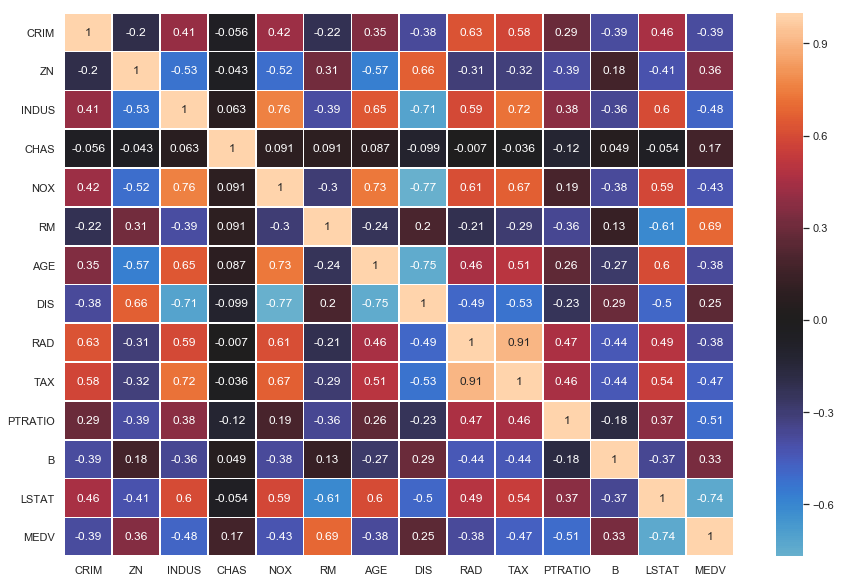

In [46]:
correlation_matrix = boston.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix ,center=0 , linewidths=.7, annot=True)

In [47]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [48]:
X.head(5)

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [28]:
Y.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [30]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
print(lin_model.intercept_,lin_model.coef_)

2.7362403426066173 [-0.71722954  4.58938833]


Regression equation:

\begin{equation*}
MEDV_{Predict} = 2.7362403426066173 + (-0.71722954)\times LSTAT  + (4.58938833)\times RM
\end{equation*}

In [31]:
accuracy = lin_model.score(X_test,Y_test)
print(accuracy*100,'%')

66.28996975186952 %


In [32]:
accuracy = lin_model.score(X_train,Y_train)
print(accuracy*100,'%')

63.007451493317014 %
